# Machine learning: La forma clásica

## Cargar datos y crear características básicas

In [2]:
# Import pandas
import pandas as pd

In [3]:
# Load data
df = pd.read_csv("data/attrition.csv")

In [4]:
# Show first 5 rows
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Dummy encoding
df = pd.get_dummies(df)

In [6]:
# Show first 5 rows
df.head()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1313919,41,1102,1,2,1,2,94,3,2,...,0,1,0,0,0,0,1,1,0,1
1,1200302,49,279,8,1,1,3,61,2,2,...,0,0,1,0,0,1,0,1,1,0
2,1060315,37,1373,2,2,1,4,92,2,1,...,0,1,0,0,0,0,1,1,0,1
3,1272912,33,1392,3,4,1,4,56,3,1,...,0,0,1,0,0,1,0,1,0,1
4,1414939,27,591,2,1,1,1,40,3,1,...,0,1,0,0,0,1,0,1,1,0


In [7]:
# Rename column attrition_yes to attrition
df.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True)

In [8]:
# Drop column Attrition_no
df = df.drop(columns=['Attrition_No'])

In [9]:
# Drop employee id
df = df.drop(columns=['EmployeeID'])

## Modelo: clasiificación binaria

In [10]:
# Create X and y
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [11]:
# Find best variables with RFECV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Create the RFE object and compute a cross-validated score.
rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=5, scoring='accuracy', min_features_to_select=10)
rfecv.fit(X, y)

/Users/faviovazquez/.conda/envs/pythonProject/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RFECV(cv=5, estimator=RandomForestClassifier(), min_features_to_select=10,
      scoring='accuracy')

In [12]:
# Transform the dataframe to show the selected features
X_selected = rfecv.transform(X)

In [13]:
rfecv.get_feature_names_out()

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'Shift', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Cardiology',
       'Department_Maternity', 'Department_Neurology',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Nurse', 'JobRole_Other',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes'],
      dtype=object)

In [14]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

In [15]:
# Create baseline model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9166666666666666


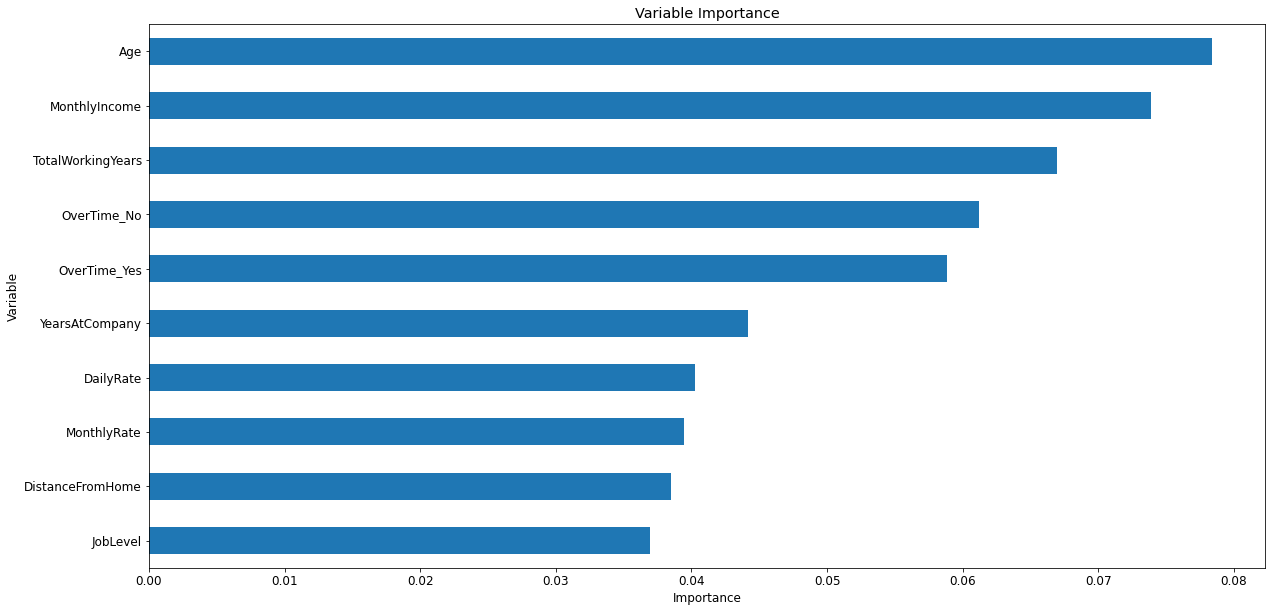

In [19]:
# Plot variable importance from the random forest
import matplotlib.pyplot as plt

feature_names = rfecv.get_feature_names_out().tolist()
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
plt.figure(figsize=(20,10))
forest_importances.nlargest(10).plot(kind='barh').invert_yaxis()
# increase the font size
plt.rcParams.update({'font.size': 12})
# add title and labels
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Variable')
# show the plot
plt.show()

## Modelo: clasificación binaria con grid search y cross validation

In [21]:
# Create a pipeline to search for the best parameters
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Create a dictionary of parameters to try
parameters = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [4, 6, 8]
}

# Create a grid search object
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [4, 6, 8],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__n_estimators': [100, 200, 300]},
             verbose=1)

In [22]:
# View the best parameters
print(grid_search.best_params_)

# View the best score
print(grid_search.best_score_)

{'classifier__max_depth': 6, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
0.914179104477612


In [23]:
# View the complete results
print(grid_search.cv_results_)

{'mean_fit_time': array([0.18985729, 0.43246045, 0.58716421, 0.16662879, 0.36326733,
       0.48079438, 0.18028626, 0.30078559, 0.44892206, 0.14310217,
       0.28305516, 0.42853165, 0.15848222, 0.31637559, 0.48871613,
       0.15177956, 0.3620542 , 0.53432589]), 'std_fit_time': array([0.00527157, 0.04796463, 0.04485121, 0.00898205, 0.0116462 ,
       0.0484899 , 0.01695734, 0.0029687 , 0.00520086, 0.00201627,
       0.00146612, 0.00524678, 0.00163352, 0.00551793, 0.02058451,
       0.00510851, 0.07194673, 0.06549266]), 'mean_score_time': array([0.01361432, 0.02959638, 0.04024663, 0.01335702, 0.02373972,
       0.03358531, 0.0116981 , 0.01931524, 0.0296649 , 0.01005478,
       0.01969204, 0.02899871, 0.01069274, 0.02014942, 0.03744221,
       0.01023469, 0.02587018, 0.02897801]), 'std_score_time': array([0.00283791, 0.00472303, 0.00526953, 0.00289833, 0.00137761,
       0.00464056, 0.00258573, 0.00029684, 0.00078834, 0.00024646,
       0.00040052, 0.00040407, 0.00057112, 0.00063306, 0.

In [24]:
# View the mean test score for each parameter combination
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.902239 (0.005484) with: {'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
0.904478 (0.007683) with: {'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}
0.902985 (0.004720) with: {'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 300}
0.905224 (0.005061) with: {'classifier__max_depth': 4, 'classifier__max_features': 'log2', 'classifier__n_estimators': 100}
0.901493 (0.005585) with: {'classifier__max_depth': 4, 'classifier__max_features': 'log2', 'classifier__n_estimators': 200}
0.901493 (0.006506) with: {'classifier__max_depth': 4, 'classifier__max_features': 'log2', 'classifier__n_estimators': 300}
0.914179 (0.007827) with: {'classifier__max_depth': 6, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
0.912687 (0.009615) with: {'classifier__max_depth': 6, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}
0.911194

In [25]:
# View the best model
print(grid_search.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=6))])


In [26]:
# Predict on the test set
y_pred = grid_search.predict(X_test)

In [27]:
# Evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8988095238095238
